In [1]:
import pandas as pd
import pybedtools

# Load C-terminus eCLIP

In [2]:
l2fc_threshold = 2
l10p_threshold = 3

# Annotated
cterminus_bed_path = '../annotated_eclips/STAMP.PRBF_1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.annotated'

# Annotated IDR
cterminus_eclip_df = pd.read_csv(
    cterminus_bed_path, 
    sep='\t',
    names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'geneid', 'genename', 'region', 'annot']
)

cterminus_eclip_df = cterminus_eclip_df[(cterminus_eclip_df.l2fc > l2fc_threshold) & (cterminus_eclip_df.l10p > l10p_threshold)]


# Load STAMP regions that did not overlap with C-terminus eCLIP

In [3]:
red_zone = pd.read_csv('c_eclip_sc_agg_stamp_red_regions.tsv', sep='\t', index_col=0)

In [4]:
from collections import defaultdict

genes_without_versions = defaultdict(lambda:[])
for g in list(set(red_zone.id2_stamp)):
    genes_without_versions[g.split('.')[0]].append(g)
    if len(genes_without_versions[g.split('.')[0]]) == 2:
        print(genes_without_versions[g.split('.')[0]])
    

['ENSG00000241343.5,ENSG00000257529.1,ENSG00000257529.1,ENSG00000241343.5,ENSG00000241343.5', 'ENSG00000241343.5']


In [5]:
genes_in_red_zone = set([i.split('.')[0] for i in list(red_zone.id2_stamp)])

In [6]:
len(genes_in_red_zone)

753

In [7]:
cterminus_eclip_df.groupby('region').count()

,chrom,start,end,l2fc,l10p,strand,geneid,genename,annot
region,,,,,,,,,
3utr,10135,10135,10135,10135,10135,10135,10135,10135,10135
5utr,2111,2111,2111,2111,2111,2111,2111,2111,2111
CDS,3906,3906,3906,3906,3906,3906,3906,3906,3906
distintron500,255,255,255,255,255,255,255,255,255
distnoncoding_intron500,63,63,63,63,63,63,63,63,63
intergenic,8,8,8,8,8,8,8,8,8
miRNA,5,5,5,5,5,5,5,5,5
noncoding_exon,269,269,269,269,269,269,269,269,269
proxintron500,87,87,87,87,87,87,87,87,87


In [8]:
genes_without_versions = defaultdict(lambda:[])
for g in list(set(cterminus_eclip_df.geneid)):
    genes_without_versions[g.split('.')[0]].append(g)
    if len(genes_without_versions[g.split('.')[0]]) == 2:
        print(genes_without_versions[g.split('.')[0]])

['ENSG00000181638.13,ENSG00000264668.1', 'ENSG00000181638.13']
['ENSG00000165156.10,ENSG00000259305.1,ENSG00000165156.10,ENSG00000165156.10', 'ENSG00000165156.10']
['ENSG00000108774.10', 'ENSG00000108774.10,ENSG00000267261.1']
['ENSG00000185883.6,ENSG00000260272.1,ENSG00000185883.6', 'ENSG00000185883.6']
['ENSG00000146587.13,ENSG00000272968.1,ENSG00000146587.13', 'ENSG00000146587.13']
['ENSG00000167770.7,ENSG00000256100.1,ENSG00000167770.7,ENSG00000167770.7,ENSG00000167770.7,ENSG00000167770.7', 'ENSG00000167770.7']
['ENSG00000095319.10', 'ENSG00000095319.10,ENSG00000251184.1']
['ENSG00000205352.6', 'ENSG00000205352.6,ENSG00000197111.11,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6,ENSG00000205352.6']
['ENSG00000100926.10,ENSG00000254692.1,ENSG00000100926.10', 'ENSG00000100926.10']
['ENSG00000179195.11,ENSG00000178882.9', 'ENSG00000179195.11']
['ENSG00000163463.7', 'ENSG00000163463.7,ENSG00000273088.1']
['EN

In [9]:
ct_eclip_target_genes = set([i.split('.')[0] for i in list(cterminus_eclip_df.geneid)])

# Venn

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

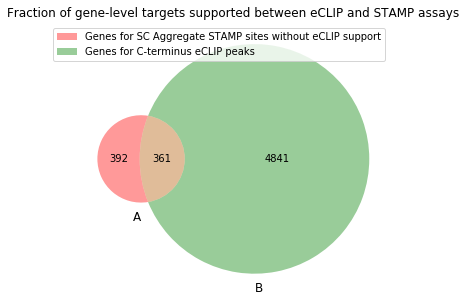

In [11]:
plt.figure(figsize=(10,5))
venn2([genes_in_red_zone, ct_eclip_target_genes])

plt.title("Fraction of gene-level targets supported between eCLIP and STAMP assays")
plt.legend(['Genes for SC Aggregate STAMP sites without eCLIP support', 'Genes for C-terminus eCLIP peaks'])
plt.savefig('../new_svgs/venn_genes_for_stamp_without_eclip_support_intersected_with_eclip_peak_genes_single_cell.svg')

# Which ones do not have any target-level support in eCLIP data?

In [12]:
len(genes_in_red_zone.difference(ct_eclip_target_genes))

392

In [13]:
tpm_combined = pd.read_csv('tpm_combined.tsv', sep='\t', index_col=0)
tpm_combined.index = [i.split('.')[0] for i in tpm_combined.index]
tpm_combined.loc[list(genes_in_red_zone.difference(ct_eclip_target_genes))].to_csv('392_genes_with_tpm.tsv',
                                                                                   sep='\t',
                                                                                   index=True,
                                                                                   header=True)

/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
red_zone['geneid'] = [i.split('.')[0] for i in red_zone.id2_stamp]

### Calculate proximity to eCLIP peak for those...

In [15]:
stamp_sites_without_support_but_on_eclip_genes = red_zone[red_zone.geneid.isin(list(genes_in_red_zone.intersection(ct_eclip_target_genes)))]

In [16]:
len(stamp_sites_without_support_but_on_eclip_genes)

389

In [17]:
len(set(stamp_sites_without_support_but_on_eclip_genes.geneid))

361

In [18]:
cterminus_eclip_df['geneid_no_version'] = [i.split('.')[0] for i in cterminus_eclip_df.geneid]

In [19]:
min_distances = defaultdict(lambda:[])
for site in stamp_sites_without_support_but_on_eclip_genes.iterrows():
    site = site[1]
    geneid = site.geneid
    chrom = site.chrom_stamp
    start = site.start_stamp
    end = site.end_stamp
    
    stamp_peak_middle = start + ((end - start)/2)
    
    eclip_sites = cterminus_eclip_df[cterminus_eclip_df.geneid_no_version == geneid]
    assert(list(eclip_sites[['chrom']].iloc[0]) == [chrom])
    starts = list(eclip_sites.start)
    ends = list(eclip_sites.end)
    mids = list(eclip_sites.start + (eclip_sites.end - eclip_sites.start)/2)

    min_dist_stamp_to_eclip = float('inf')
    for eclip_mid in mids:
        dist_stamp_to_eclip = abs(stamp_peak_middle-eclip_mid)
        if dist_stamp_to_eclip < min_dist_stamp_to_eclip:
            min_dist_stamp_to_eclip = dist_stamp_to_eclip

    min_distances[geneid].append(min_dist_stamp_to_eclip)

    #if len(mids) > 2:
    #    print(geneid)



In [20]:
# Number of values should be equal to number of stamp sites in intersection
all_items = []
for k,v in min_distances.items():
    for value in v:
        all_items.append(value)
print(len(all_items))

389


(array([82., 39., 23., 15., 10., 11.,  6.,  5.,  7.,  7.,  4.,  3.,  2.,
         3.,  2.,  4.,  1.,  4.,  4., 10.,  2.,  2.,  2.,  1.,  1.,  4.,
         4.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,
         3.,  1.,  1.,  2.,  1.,  1.,  3.,  3.,  2.,  0.,  2.]),
 array([  236.5 ,   626.93,  1017.36,  1407.79,  1798.22,  2188.65,
         2579.08,  2969.51,  3359.94,  3750.37,  4140.8 ,  4531.23,
         4921.66,  5312.09,  5702.52,  6092.95,  6483.38,  6873.81,
         7264.24,  7654.67,  8045.1 ,  8435.53,  8825.96,  9216.39,
         9606.82,  9997.25, 10387.68, 10778.11, 11168.54, 11558.97,
        11949.4 , 12339.83, 12730.26, 13120.69, 13511.12, 13901.55,
        14291.98, 14682.41, 15072.84, 15463.27, 15853.7 , 16244.13,
        16634.56, 17024.99, 17415.42, 17805.85, 18196.28, 18586.71,
        18977.14, 19367.57, 19758.  ]),
 <a list of 50 Patch objects>)

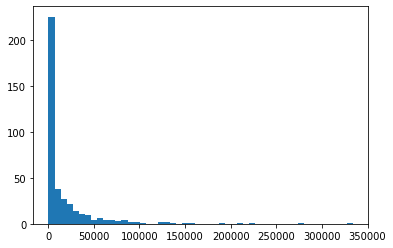

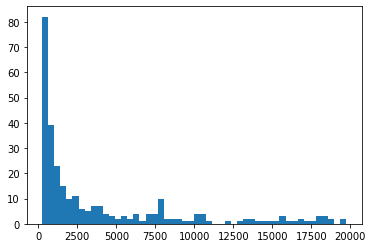

In [21]:
from matplotlib import pyplot as plt
plt.hist(all_items, bins=50)
plt.figure()
plt.hist([i for i in all_items if i < 20000], bins=50)

In [52]:
cumulative = []
max_distances = [200*i for i in range(1700)]

for m in max_distances:
    cumulative.append(len([i for i in all_items if i < m]))

In [53]:
cumulative[-1]

389

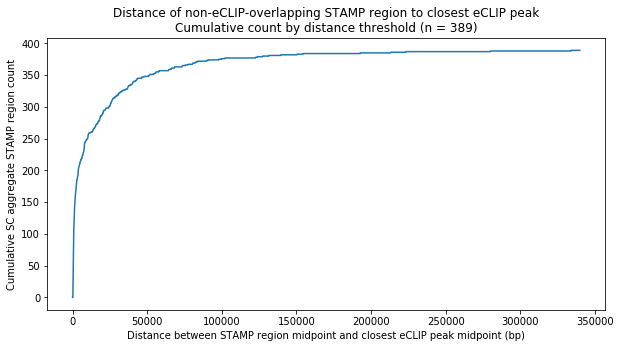

In [57]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(max_distances, cumulative)
plt.title("Distance of non-eCLIP-overlapping STAMP region to closest eCLIP peak\nCumulative count by distance threshold (n = {})".format(len(all_items)))
plt.xlabel("Distance between STAMP region midpoint and closest eCLIP peak midpoint (bp)")
plt.ylabel("Cumulative SC aggregate STAMP region count")
plt.savefig('../new_svgs/cumulative_ct_non_eclip_supported_dist_from_eclip_zoomed_out_single_cell.svg')

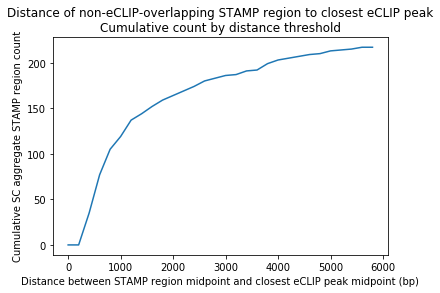

In [58]:
import seaborn as sns
sns.lineplot(max_distances[0:30], cumulative[0:30])
plt.title("Distance of non-eCLIP-overlapping STAMP region to closest eCLIP peak\nCumulative count by distance threshold")
plt.xlabel("Distance between STAMP region midpoint and closest eCLIP peak midpoint (bp)")
plt.ylabel("Cumulative SC aggregate STAMP region count")
plt.savefig('../new_svgs/cumulative_ct_non_eclip_supported_dist_from_eclip_single_cell.svg')

In [160]:
min_distances['ENSG00000130939']

[2166.5]

In [155]:
print(chrom, start, end)

chr1 10209223 10209364


In [157]:
eclip_sites = cterminus_eclip_df[cterminus_eclip_df.geneid_no_version == geneid]
assert(list(eclip_sites[['chrom']].iloc[0]) == [chrom])
starts = list(eclip_sites.start)
ends = list(eclip_sites.end)
mids = list(eclip_sites.start + (eclip_sites.end - eclip_sites.start)/2)

min_dist_stamp_to_eclip = float('inf')
for eclip_mid in mids:
    dist_stamp_to_eclip = abs(stamp_peak_middle-eclip_mid)
    if dist_stamp_to_eclip < min_dist_stamp_to_eclip:
        min_dist_stamp_to_eclip = dist_stamp_to_eclip

In [158]:
min_dist_stamp_to_eclip

2166.5

In [147]:
eclip_sites

,chrom,start,end,l2fc,l10p,strand,geneid,genename,region,annot,geneid_no_version
58741,chr1,10240388,10240498,8.062963,3.069728,+,ENSG00000130939.14,UBE4B,3utr,ENSG00000130939.14:10092889:10241297:+:gene:EN...,ENSG00000130939
59846,chr1,10240242,10240325,4.034493,3.851822,+,ENSG00000130939.14,UBE4B,3utr,ENSG00000130939.14:10092889:10241297:+:gene:EN...,ENSG00000130939
59917,chr1,10155518,10155583,3.871621,3.754525,+,ENSG00000130939.14,UBE4B,CDS,ENSG00000130939.14:10092889:10241297:+:gene:EN...,ENSG00000130939
60944,chr1,10207107,10207147,2.526924,3.282457,+,ENSG00000130939.14,UBE4B,CDS,ENSG00000130939.14:10092889:10241297:+:gene:EN...,ENSG00000130939
61008,chr1,10132233,10132271,2.494751,3.328261,+,ENSG00000130939.14,UBE4B,CDS,ENSG00000130939.14:10092889:10241297:+:gene:EN...,ENSG00000130939


In [146]:
mids

[10240443.0, 10240283.5, 10155550.5, 10207127.0, 10132252.0]

In [130]:
eclip_sites

,chrom,start,end,l2fc,l10p,strand,geneid,genename,region,annot,geneid_no_version
73762,chr1,8072346,8072512,4.211445,3.10962,-,ENSG00000116285.8,ERRFI1,3utr,ENSG00000116285.8:8064463:8086368:-:gene:ENSG0...,ENSG00000116285


In [105]:
eclip_sites.chrom

73762    chr1
Name: chrom, dtype: object